In [6]:
from collections import Counter
import numpy as np
import pandas as pd
import datetime as dt

import json
import urllib.request

import matplotlib.pyplot as plt
import os

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('axes', axisbelow=True)
%matplotlib inline

# Load in json files

In [7]:
def findFilesInFolder(path, pathList, extension, subFolders = True):
    try:   # Trapping a OSError:  File permissions problem I believe
        for entry in os.scandir(path):
            if entry.is_file() and entry.path.endswith(extension):
                pathList.append(entry.path)
            elif entry.is_dir() and subFolders: 
                pathList = findFilesInFolder(entry.path, pathList,
                                             extension, subFolders)
    except OSError:
        print('Cannot access ' + path +'. Probably a permissions error')
    return pathList

os.chdir("/Users/aurora/northeastern/PHYS5116/irish-schools-collection")
dir_name_el = os.path.join("data", "out")
extension_el = '.json'
pathList_el = []
flist_el = findFilesInFolder(dir_name_el, pathList_el, extension_el, True)
flist_el = sorted(flist_el)
print(len(flist_el),"files total. E.g.:")
flist_el[:5]

208 files total. E.g.:


['data/out/schools-collection_1798.json',
 'data/out/schools-collection_Accessories.json',
 'data/out/schools-collection_Agents.json',
 'data/out/schools-collection_Agriculture.json',
 'data/out/schools-collection_Animal husbandry.json']

# Example

In [ ]:
example_fn = flist_el[181]

In [ ]:
with open(example_fn) as x:
    dat_i = json.load(x)

In [ ]:
print(example_fn.replace(dir_name_el,''),
      "-- contains",len(dat_i),"entries. Keys:")
list(dat_i.keys())[:5]

In [ ]:
ex = 0
list(dat_i.values())[ex]

In [ ]:
text_ex = list(dat_i.values())[ex]['text'].replace('\n','')
text_ex

# Span through all entries

In [8]:
import re

In [9]:
english_stopwords = ['continued','next','page',"","a","about","above","after",
            "again","against","ain","all","am","an","and","any","are","aren",
            "aren't","as","at","be","because","been","before","being",
            "below","between","both","but","by","can","couldn","couldn't",
            "d","did","didn","didn't","do","does","doesn","doesn't",
            "doing","don","don't","down","during","each","few","for",
            "from","further","had","hadn","hadn't","has","hasn","hasn't",
            "have","haven","haven't","having","he","her","here","hers",
            "herself","him","himself","his","how","i","if","in","into",
            "is","isn","isn't","it","it's","its","itself","just","ll",
            "m","ma","me","mightn","mightn't","more","most","mustn",
            "mustn't","my","myself","needn","needn't","no","nor","not",
            "now","o","of","off","on","once","only","or","other","our",
            "ours","ourselves","out","over","own","re","s","same","shan",
            "shan't","she","she's","should","should've","shouldn","shouldn't",
            "so","some","such","t","than","that","that'll","the","their",
            "theirs","them","themselves","then","there","these","they",
            "this","those","through","to","too","under","until","up",
            "ve","very","was","wasn","wasn't","we","were","weren","weren't",
            "what","when","where","which","while","who","whom","why","will",
            "with","won","won't","wouldn","wouldn't","y","you","you'd",
            "you'll","you're","you've","your","yours","yourself","yourselves",
            "could","he'd","he'll","he's","here's","how's","i'd","i'll",
            "i'm","i've","let's","ought","she'd","she'll","that's",
            "there's","they'd","they'll","they're","they've","we'd",
            "we'll","we're","we've","what's","when's","where's",
            "who's","why's","would"]

irish_stopwords = ["a","ach","ag","agus","an","aon","ar","arna","as","b'","ba",
            "beirt","bhúr","caoga","ceathair","ceathrar","chomh","chtó",
            "chuig","chun","cois","céad","cúig","cúigear","d'","daichead",
            "dar","de","deich","deichniúr","den","dhá","do","don","dtí",
            "dá","dár","dó","faoi","faoin","faoina","faoinár","fara",
            "fiche","gach","gan","go","gur","haon","hocht","i","iad",
            "idir","in","ina","ins","inár","is","le","leis","lena","lenár",
            "m'","mar","mo","mé","na","nach","naoi","naonúr","ná","ní",
            "níor","nó","nócha","ocht","ochtar","os","roimh","sa","seacht",
            "seachtar","seachtó","seasca","seisear","siad","sibh","sinn",
            "sna","sé","sí","tar","thar","thú","triúr","trí","trína",
            "trínár","tríocha","tú","um","ár","é","éis","í","ó","ón","óna","ónár"]

In [19]:
all_words = []
for entry_id, data_i in dat_i.items():
    text_i = data_i['text'].replace('\n','')
    for w in text_i.split(' '):
        add_word = re.sub(r'[^\w\s]','',w).lower()
        if add_word not in irish_stopwords and add_word not in english_stopwords:
            all_words.append(add_word)

In [20]:
sorted_word_freq = {k: v for k, v in sorted(dict(Counter(all_words)).items(),
                                            key=lambda item: item[1], reverse=True)}

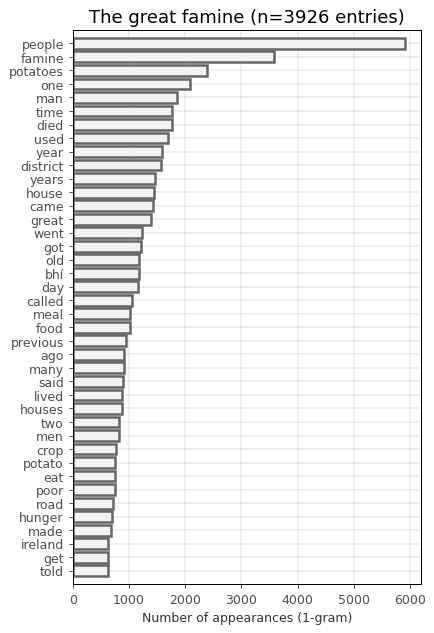

In [23]:
nwords = 40
fig, ax = plt.subplots(1,1,figsize=(5,8),dpi=90)

for ix,i in enumerate(list(sorted_word_freq)[:nwords]):
    ax.barh(ix+1, sorted_word_freq[i], ec='.4', fc='.95', lw=2,)

ax.set_yticks(np.linspace(nwords,1,nwords))
ax.set_yticklabels([i for i in list(sorted_word_freq)[:nwords][::-1]])
ax.set_ylim(nwords+1,0)
ax.grid(lw=1.5, color='.75', alpha=0.25)
ax.tick_params(labelcolor='.3', color='.3')
ax.set_xlabel('Number of appearances (1-gram)', color='.2')
ax.set_title(example_fn.replace(dir_name_el,'').split('_')[-1].replace('.json','')+\
             ' (n=%i entries)'%(len(dat_i)),
             fontsize='x-large')

plt.savefig('figs/pngs/schools_GreatFamine_1grams.png',dpi=425,bbox_inches='tight')
plt.savefig('figs/pdfs/schools_GreatFamine_1grams.pdf',bbox_inches='tight')

plt.show()

___________

In [ ]:
all_2grams = []
for entry_id, data_i in dat_i.items():
    text_i = data_i['text'].replace('\n','')
    text_i_new = []
    for w in text_i.split(' '):
        add_word = re.sub(r'[^\w\s]','',w).lower()
        if add_word not in irish_stopwords and add_word not in english_stopwords:
            text_i_new.append(add_word)

    text_i = " ".join(text_i_new)
    for i in english_stopwords:
        if len(i)>1:
            text_i = text_i.replace(" "+i+" ",'').replace('  ',' ')

    for i in irish_stopwords:
        if len(i)>1:
            text_i = text_i.replace(" "+i+" ",'').replace('  ',' ')

    text = [text_i]
    bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]

    for bg in bigrams:
        all_2grams.append(bg)

In [ ]:
sorted_2gram_freq = {k: v for k, v in sorted(dict(Counter(all_2grams)).items(),
                                            key=lambda item: item[1], reverse=True)}

In [ ]:
nwords = 40
fig, ax = plt.subplots(1,1,figsize=(5,8),dpi=90)

for ix,i in enumerate(list(sorted_2gram_freq)[:nwords]):
    ax.barh(ix+1, sorted_2gram_freq[i], ec='.4', fc='.95', lw=2,)

ax.set_yticks(np.linspace(nwords,1,nwords))
ax.set_yticklabels([" ".join(i) for i in list(sorted_2gram_freq)[:nwords][::-1]])
ax.set_ylim(nwords+1,0)
ax.grid(lw=1.5, color='.75', alpha=0.25)
ax.tick_params(labelcolor='.3', color='.3')
ax.set_xlabel('Number of appearances (2-gram)', color='.2')
ax.set_title(example_fn.replace(dir_name_el,'').split('_')[-1].replace('.json','')+\
             ' (n=%i entries)'%(len(dat_i)),
             fontsize='x-large')

plt.savefig('../figs/pngs/schools_GreatFamine_2grams.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/schools_GreatFamine_2grams.pdf',bbox_inches='tight')

plt.show()

# Get unique words for all stories

In [18]:
def unique_words_all_stories(topics, english_stop, irish_stop):
    story_word_counts = []
    word_set = set()
    num_stories = 0

    for topic in topics:
        print(topic)
        with open(topic, "r") as fh_in:
                topic_story_list = json.load(fh_in)

        for story_id, story_data in topic_story_list.items():
            num_stories += 1
            story_words = []

            story_text = story_data['text'].replace('\n','')
            for word in story_text.split(' '):
                cleaned_word = re.sub(r'[^\w\s]','',word).lower()
                if cleaned_word not in irish_stop and cleaned_word not in english_stop:
                    story_words.append(cleaned_word)
                    word_set.add(cleaned_word)

            story_sorted_word_freq = {k: v for k, v in sorted(dict(Counter(story_words)).items(),
                                                              key=lambda item: item[1], reverse=True)}

            story_word_counts.append(story_sorted_word_freq)

    word_list = list(word_set)

    return word_list, story_word_counts

In [11]:
test_topic = flist_el[181]

In [12]:
with open(test_topic) as test_fh:
    test_topic_data = json.load(test_fh)

In [13]:
print(test_topic.replace(dir_name_el,''),
      "-- contains",len(test_topic_data),"entries. Keys:")
list(test_topic_data.keys())[:5]

/schools-collection_The great famine.json -- contains 3926 entries. Keys:


['4428270/4390292/4429228',
 '4427865/4351855/4434407',
 '4428183/4384591/4434575',
 '4428270/4390301/4435001',
 '4428270/4390317/4435015']

In [14]:
test_file_list = list()
test_file_list.append(test_topic)
print(test_file_list[0])

data/out/schools-collection_The great famine.json


In [19]:
test_words, test_counts = unique_words_all_stories(test_file_list, english_stopwords, irish_stopwords)

data/out/schools-collection_The great famine.json


________________

In [20]:
print(test_counts[0])

{'roller': 3, 'sad': 2, 'laghey': 2, 'bicycle': 2, 'driver': 2, 'tragedy': 1, 'occurred': 1, 'saturday': 1, 'last': 1, '30th': 1, 'october': 1, '1937': 1, 'mr': 1, 'albert': 1, 'flood': 1, 'time': 1, 'driving': 1, 'accidentally': 1, 'killed': 1, 'way': 1, 'pettigo': 1, 'occurrence': 1, 'happened': 1, 'cycling': 1, 'past': 1, 'stone': 1, 'breaker': 1, 'main': 1, 'road': 1, 'four': 1, 'miles': 1, 'appears': 1, 'unfortunate': 1, 'man': 1, 'raised': 1, 'hand': 1, 'handle': 1, 'salute': 1, 'slipped': 1, 'thrown': 1, 'received': 1, 'terrible': 1, 'injuries': 1, 'head': 1, 'died': 1, 'immediately': 1, 'inquest': 1, 'subsequently': 1, 'held': 1, 'exonerated': 1, 'blame': 1}


In [21]:
print(test_words)

{'mane', '34', 'tráigh', 'trouiscinduring', 'clashmore', 'tuig', 'drainage', 'clonmelcholera', 'ghaibh', 'crónbhí', 'gartlans', '17', 'mham', 'offare', 'feenagh', 'cartridges', 'boots', 'deadi', 'doona', 'lacy', 'misfortune', 'habit', 'cockles', 'bruckless', 'sintháinig', 'scúab', 'pageeverywhere', 'kilmurry', 'sally', 'handmade', 'latest', 'homecontinues', 'burke', 'streetsmy', 'gallowsthat', 'fuil', 'ghaoth', 'háiteanna', 'hegarty', 'aindruí', 'airds', 'sheach', 'pageday', 'cheadna', 'shoemakers', 'aimsir', 'aosta', 'mhionnuigh', 'bending', 'folkso', 'hourigans', 'sgeulta', 'bosheen', 'irishamerican', 'galwayfrom', 'cholerawas', 'éirin', 'finish', 'jerusalem', 'cgh', 'resist', 'derreen', 'disuse', 'firea', 'yetyour', 'turnip', 'pagedoors', 'fridays', 'gelignite', 'scot', 'pagefor', 'murderthere', 'stableboy', 'approaching', 'fútha', 'cabáiste', 'barnane', 'barraille', 'americaafter', 'dem', 'churchyardthe', 'thread', 'stony', 'started', 'contagious', 'cavalry', 'tramping', 'yearsrath

In [22]:
word_list_all, all_story_counts = unique_words_all_stories(flist_el, english_stopwords, irish_stopwords)

data/out/schools-collection_1798.json
data/out/schools-collection_Accessories.json
data/out/schools-collection_Agents.json
data/out/schools-collection_Agriculture.json
data/out/schools-collection_Animal husbandry.json
data/out/schools-collection_Animal-lore.json
data/out/schools-collection_Ash Wednesday.json
data/out/schools-collection_Backache.json
data/out/schools-collection_Balar.json
data/out/schools-collection_Banshees.json
data/out/schools-collection_Basket-making.json
data/out/schools-collection_Battle of Aughrim.json
data/out/schools-collection_Battle of Clontarf.json
data/out/schools-collection_Battle of Kinsale.json
data/out/schools-collection_Battle of Knocknanuss.json
data/out/schools-collection_Battle of the Boyne.json
data/out/schools-collection_Belief.json
data/out/schools-collection_Biddy Early.json
data/out/schools-collection_Bird-lore.json
data/out/schools-collection_Birth.json
data/out/schools-collection_Black pig.json
data/out/schools-collection_Blackleg.json
data/o

In [24]:
all_story_counts[1]

{'ditch': 2,
 'two': 2,
 'grace': 1,
 'dieu': 1,
 'curve': 1,
 '200': 1,
 'yds': 1,
 'west': 1,
 'side': 1,
 'tom': 1,
 'hands': 1,
 'house': 1,
 'space': 1,
 'roadside': 1,
 'mark': 1,
 'graves': 1,
 'recently': 1,
 'covered': 1,
 'clay': 1,
 'thrown': 1,
 'road': 1,
 'repaired': 1,
 'people': 1,
 'roscall': 1,
 'say': 1,
 'rebels': 1,
 'killed': 1,
 'insurrection': 1,
 'nineyeight': 1,
 'buried': 1}

In [25]:
print(len(all_story_counts))

209178


In [26]:
print(len(word_list_all))

547330


In [27]:
import numpy as np

In [29]:
# count_matrix = []
# num_done = 0
#
# for s in all_story_counts:
#     word_occs = []
#     for w in word_list_all:
#         if w in s:
#             word_occs.append(s[w])
#         else:
#             word_occs.append(0)
#
#     count_matrix.append(word_occs)
#     num_done += 1
#     print(num_done)

{'mcevoy': 6,
 'pipers': 4,
 'vivela': 4,
 'said': 3,
 'one': 2,
 'man': 2,
 'horse': 2,
 'miles': 2,
 'james': 2,
 'going': 2,
 'breeches': 2,
 'story': 1,
 '98': 1,
 'year': 1,
 '1798': 1,
 'small': 1,
 'crowd': 1,
 'used': 1,
 'cockles': 1,
 'bridge': 1,
 'night': 1,
 'playing': 1,
 'pipes': 1,
 'came': 1,
 'galloping': 1,
 'sweat': 1,
 'rolling': 1,
 'stopped': 1,
 'oh': 1,
 'cursed': 1,
 'english': 1,
 'chased': 1,
 'pitied': 1,
 'gave': 1,
 'hospitality': 1,
 'except': 1,
 'afraid': 1,
 'spy': 1,
 'laughed': 1,
 'ridiculed': 1,
 'week': 1,
 'watched': 1,
 'carefully': 1,
 'day': 1,
 'saw': 1,
 'riding': 1,
 'away': 1,
 'naul': 1,
 'followed': 1,
 'kill': 1,
 'tell': 1,
 'confessed': 1,
 'england': 1,
 'killed': 1,
 'hole': 1,
 'wore': 1,
 'leather': 1,
 'patch': 1,
 'put': 1,
 'soldier': 1,
 'arrested': 1,
 'killing': 1,
 'sic': 1,
 'tried': 1,
 'made': 1,
 'exactly': 1,
 'samecontinues': 1}

In [31]:
# with open(flist_el[-2]) as worm_fh:
#     worms = json.load(worm_fh)
#
# num_words = 37
#
# fig, ax = plt.subplots(1,1,figsize=(5,8),dpi=90)
#
# for ix,i in enumerate(list(all_story_words[-2])[:num_words]):
#     ax.barh(ix+1, all_story_words[-2][i], ec='.4', fc='.95', lw=2,)
#
# ax.set_yticks(np.linspace(num_words,1,num_words))
# ax.set_yticklabels([i for i in list(all_story_words[-2])[:num_words][::-1]])
# ax.set_ylim(num_words+1,0)
# ax.grid(lw=1.5, color='.75', alpha=0.25)
# ax.tick_params(labelcolor='.3', color='.3')
# ax.set_xlabel('Number of appearances (1-gram)', color='.2')
# ax.set_title(flist_el[-2].replace(dir_name_el,'').split('_')[-1].replace('.json','')+\
#              ' (n=%i entries)'%(len(worms)),
#              fontsize='x-large')
#
# plt.savefig('figs/pngs/schools_worm_1grams.png',dpi=425,bbox_inches='tight')
# plt.savefig('figs/pdfs/schools_worm_1grams.pdf',bbox_inches='tight')
#
# plt.show()

KeyboardInterrupt: 

# Create a collector-informant network

In [ ]:
import networkx as nx

In [ ]:
G = nx.DiGraph()
edgelist = []
edgemeta = []
for entry_id, data_i in dat_i.items():
    col_list = [i for i in data_i['metadata'] if 'Collector' in list(i.keys())]
    inf_list = [i for i in data_i['metadata'] if 'Informant' in list(i.keys())]

    if len(col_list) > 0 and len(inf_list) > 0:
        collector_i = col_list[0]
        informant_i = inf_list[0]
        node_i = collector_i['Collector'].replace('/n','')
        node_j = informant_i['Informant'].replace('/n','')
        if node_j == '(name not given)':
            continue
        eij = (node_i+' - collector',node_j+' - informant')
#         att = {'Gender':''}

#         if "Gender" in list(collector_i.keys()) and "Gender" in list(informant_i.keys()):
#             att['Gender'] = collector_i['Gender'].lower()+'-'+informant_i['Gender'].lower()
            
        G.add_edge(eij[0],eij[1])#,gender=att['Gender'])


In [ ]:
giant = max(nx.weakly_connected_components(G), key=len)
print(len(giant),'nodes in the largest weakly connected component')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8),dpi=100)
Gp = nx.subgraph(G,giant)
indegs = np.array(list(dict(Gp.in_degree()).values()))
indegs = indegs / (max(indegs)+1)
indegs_cols = plt.cm.viridis(indegs)
ncs = [indegs_cols[ix] if i>0 else '.95' for ix,i in enumerate(indegs)]
pos = nx.kamada_kawai_layout(Gp)
pos = nx.spring_layout(Gp,pos=pos,iterations=20)
nx.draw(Gp,pos,edge_color='.4',edgecolors='.6',node_color=ncs,
        linewidths=2.0,node_size=150,width=2.0)

plt.savefig('../figs/pngs/schools_GreatFamine_giantcomponent.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/schools_GreatFamine_giantcomponent.pdf',bbox_inches='tight')

plt.show()

______________

# Do the same thing but across several topics

In [ ]:
G = nx.DiGraph()
full_data = {}

for fi,fn_i in enumerate(flist_el[:50]):
    with open(fn_i) as x:
        dat_i = json.load(x)
    
    for entry, data_i in dat_i.items():
        if entry not in list(full_data.keys()):
            full_data[entry] = data_i

            col_list = [i for i in data_i['metadata'] if 'Collector' in list(i.keys())]
            inf_list = [i for i in data_i['metadata'] if 'Informant' in list(i.keys())]

            if len(col_list) > 0 and len(inf_list) > 0:
                collector_i = col_list[0]
                informant_i = inf_list[0]
                node_i = collector_i['Collector'].replace('/n','')
                node_j = informant_i['Informant'].replace('/n','')
                if node_j == '(name not given)':
                    continue
                eij = (node_i+' - collector',node_j+' - informant')
#                 att = {'Gender':''}

#                 if "Gender" in list(collector_i.keys()) and "Gender" in list(informant_i.keys()):
#                     att['Gender'] = collector_i['Gender'].lower()+'-'+informant_i['Gender'].lower()

                G.add_edge(eij[0],eij[1])#,gender=att['Gender'])

In [ ]:
giant = max(nx.weakly_connected_components(G), key=len)
print(len(giant),'nodes in the largest weakly connected component')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,8),dpi=100)
Gp = nx.subgraph(G,giant)
indegs = np.array(list(dict(Gp.in_degree()).values()))
indegs = indegs / (max(indegs)+1)
indegs_cols = plt.cm.viridis(indegs)
ncs = [indegs_cols[ix] if i>0 else '.95' for ix,i in enumerate(indegs)]
pos = nx.kamada_kawai_layout(Gp)
pos = nx.spring_layout(Gp,pos=pos,iterations=20)
nx.draw(Gp,pos,edge_color='.4',edgecolors='.6',node_color=ncs,
        linewidths=2.0,node_size=150,width=2.0)

plt.savefig('../figs/pngs/schools_subset_giantcomponent.png',dpi=425,bbox_inches='tight')
plt.savefig('../figs/pdfs/schools_subset_giantcomponent.pdf',bbox_inches='tight')

plt.show()

___________